In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
#Загружаем библиотеки

In [21]:
data = pd.read_excel('C:/Users/User/Downloads/kursach/perevoz.xlsx')
df = data.copy()
#Загружаем датасет и делаем его копию

In [22]:
df.columns = df.columns.str.rstrip()
df.columns
#Смотрим какие у нас колонки

Index(['Код станции отправления', 'Станция отправления', 'Регион отгрузки',
       'Ж/Д отгрузки', 'Отд. ж/д отгрузки', 'Код станции назначения',
       'Станция назначения', 'Регион поставки', 'Ж/Д поставки',
       'Отд. ж/д поставки', 'Код Клиента', 'Клиент', 'Код отправителя груза',
       'ОКПО отправителя', 'Отправитель', 'ФИО Руководителя Отправителя',
       'Почтовый индекс Отправителя', 'Адрес Отправителя', 'Тел. Отправителя',
       'E-mail Отправителя', 'Факс Отправителя', 'Код получателя груза',
       'ОКПО получателя', 'Получатель', 'ФИО Руководителя получателя',
       'Почтовый индекс получателя', 'Адрес получателя', 'Тел. получателя',
       'E-mail Получателя', 'Факс получателя', 'Код груза',
       'Наименование груза', 'Вес груза, тонн', 'Количество вагонов',
       'Тонно-километры', 'Дата отгрузки', 'Дата прибытия',
       'Характер перевозок', 'Станция отправления загран',
       'Код станции отправления загран', 'Станция назначения загран',
       'Код станции 

In [23]:
df = df[(df['Ж/Д отгрузки'] == 'Московская') & (df['Ж/Д поставки'] == 'Московская')]
df
#Выполняем условия варианта, только Московская железная дорога

,Код станции отправления,Станция отправления,Регион отгрузки,Ж/Д отгрузки,Отд. ж/д отгрузки,Код станции назначения,Станция назначения,Регион поставки,Ж/Д поставки,Отд. ж/д поставки,...,Станция отправления загран,Код станции отправления загран,Станция назначения загран,Код станции назначения загран,Отч мес,Отч год,Код страны отправления,Страна отправления,Код страны назначения,Страна назначения
399,23670,БУЖАНИНОВО,МОСКОВСКАЯ ОБЛАСТЬ,Московская,МОСК-ЯРОСЛАВ,23670,БУЖАНИНОВО,МОСКОВСКАЯ ОБЛАСТЬ,Московская,МОСК-ЯРОСЛАВ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
505,23670,БУЖАНИНОВО,МОСКОВСКАЯ ОБЛАСТЬ,Московская,МОСК-ЯРОСЛАВ,20810,РЫШКОВО,КУРСКАЯ ОБЛАСТЬ,Московская,КУРСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
506,23670,БУЖАНИНОВО,МОСКОВСКАЯ ОБЛАСТЬ,Московская,МОСК-ЯРОСЛАВ,19020,СЕРПУХОВ,МОСКОВСКАЯ ОБЛАСТЬ,Московская,МОСК-КУРСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
507,23670,БУЖАНИНОВО,МОСКОВСКАЯ ОБЛАСТЬ,Московская,МОСК-ЯРОСЛАВ,19020,СЕРПУХОВ,МОСКОВСКАЯ ОБЛАСТЬ,Московская,МОСК-КУРСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
508,23670,БУЖАНИНОВО,МОСКОВСКАЯ ОБЛАСТЬ,Московская,МОСК-ЯРОСЛАВ,19020,СЕРПУХОВ,МОСКОВСКАЯ ОБЛАСТЬ,Московская,МОСК-КУРСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36008,20000,БРЯНСК-ЛЬГОВСКИЙ,БРЯНСКАЯ ОБЛАСТЬ,Московская,БРЯHСКОЕ,21580,СТАЛЬНОЙ КОНЬ,ОРЛОВСКАЯ ОБЛАСТЬ,Московская,ОРЛОВСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36009,20000,БРЯНСК-ЛЬГОВСКИЙ,БРЯНСКАЯ ОБЛАСТЬ,Московская,БРЯHСКОЕ,17440,ВЯЗЬМА-БРЯНСКАЯ,СМОЛЕНСКАЯ ОБЛАСТЬ,Московская,СМОЛЕHСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36010,20000,БРЯНСК-ЛЬГОВСКИЙ,БРЯНСКАЯ ОБЛАСТЬ,Московская,БРЯHСКОЕ,17440,ВЯЗЬМА-БРЯНСКАЯ,СМОЛЕНСКАЯ ОБЛАСТЬ,Московская,СМОЛЕHСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ
36011,23820,ПОВАРОВО II,МОСКОВСКАЯ ОБЛАСТЬ,Московская,МОСК-ЯРОСЛАВ,20000,БРЯНСК-ЛЬГОВСКИЙ,БРЯНСКАЯ ОБЛАСТЬ,Московская,БРЯHСКОЕ,...,00000,0,00000,0,5,19,0,РОССИЯ,0,РОССИЯ


In [24]:
missing_percentage = df.isnull().sum() / len(df) * 100
columns_to_drop = missincolumns_to_drop = missing_percentage[missing_percentage > 0].index

df = df.drop(columns=columns_to_drop)

df.info()
#Удаляем все столбцы где есть пропуски

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 399 to 36012
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Код станции отправления         496 non-null    int64  
 1   Станция отправления             496 non-null    object 
 2   Регион отгрузки                 496 non-null    object 
 3   Ж/Д отгрузки                    496 non-null    object 
 4   Отд. ж/д отгрузки               496 non-null    object 
 5   Код станции назначения          496 non-null    int64  
 6   Станция назначения              496 non-null    object 
 7   Регион поставки                 496 non-null    object 
 8   Ж/Д поставки                    496 non-null    object 
 9   Отд. ж/д поставки               496 non-null    object 
 10  Код Клиента                     496 non-null    int64  
 11  Клиент                          496 non-null    object 
 12  Код отправителя груза           

In [25]:
df.describe()
#Описываем данные

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,ОКПО получателя,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Дата отгрузки,Дата прибытия,Код станции отправления загран,Код станции назначения загран,Отч мес,Отч год,Код страны отправления,Код страны назначения
count,496.000000,496.000000,4.960000e+02,496.000000,4.960000e+02,496.000000,4.960000e+02,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.0,496.0,496.000000,496.000000
mean,19654.495968,20400.120968,2.929547e+09,4249.032258,3.329247e+07,3467.360887,1.986594e+07,32324.002016,351.485679,7.324597,80928.981855,1682.703629,1626.971774,1914.798387,2374.112903,5.0,19.0,22.112903,77.346774
std,1933.725077,2125.958936,2.732112e+09,3678.183873,3.500805e+07,3018.678108,2.656280e+07,136.967009,407.069627,10.701528,112347.368787,865.058512,903.981042,5178.916189,6507.272545,0.0,0.0,86.659040,208.736770
min,17000.000000,17000.000000,1.000109e+09,109.000000,0.000000e+00,109.000000,0.000000e+00,32102.000000,0.009000,0.000000,0.000000,105.000000,105.000000,0.000000,0.000000,5.0,19.0,0.000000,0.000000
25%,18350.000000,19020.000000,1.000232e+09,294.000000,1.096611e+06,294.000000,1.869579e+06,32106.000000,69.075000,1.000000,20081.000000,905.000000,805.000000,0.000000,0.000000,5.0,19.0,0.000000,0.000000
50%,19060.000000,19870.000000,1.003777e+09,2858.000000,4.945803e+06,3370.000000,4.775382e+06,32411.000000,200.000000,3.000000,44792.000000,1705.000000,1655.000000,0.000000,0.000000,5.0,19.0,0.000000,0.000000
75%,21060.000000,23030.000000,7.000094e+09,9061.000000,7.280906e+07,5880.000000,4.230114e+07,32411.000000,441.739500,8.000000,89584.500000,2505.000000,2405.000000,0.000000,0.000000,5.0,19.0,0.000000,0.000000
max,23820.000000,23840.000000,7.000094e+09,9999.000000,8.573606e+07,9999.000000,9.902972e+07,32418.000000,2340.000000,63.000000,801360.000000,3105.000000,3105.000000,18350.000000,23790.000000,5.0,19.0,643.000000,643.000000


In [26]:
# Список столбцов для удаления
columns_to_drop = [
    'Станция отправления загран',
    'Код станции отправления загран',
    'Станция назначения загран',
    'Код станции назначения загран',
    'Отч мес',
    'Отч год',
    'Код страны отправления',
    'Страна отправления',
    'Код страны назначения',
    'Страна назначения',
    'Наименование груза',
    'ОКПО получателя',
    'Станция отправления',
    'Регион отгрузки',
    'Ж/Д отгрузки',
    'Станция назначения',
    'Ж/Д поставки',
    'Клиент',
    'Отправитель',
    'Регион поставки',
    'Отд. ж/д отгрузки',
    'Отд. ж/д поставки'
]

df = df.drop(columns=columns_to_drop)
#Удалим ненужные столбцы

In [27]:
df.info()
#Смотрим информацию о данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 399 to 36012
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Код станции отправления  496 non-null    int64  
 1   Код станции назначения   496 non-null    int64  
 2   Код Клиента              496 non-null    int64  
 3   Код отправителя груза    496 non-null    int64  
 4   ОКПО отправителя         496 non-null    int64  
 5   Код получателя груза     496 non-null    int64  
 6   Код груза                496 non-null    int64  
 7   Вес груза, тонн          496 non-null    float64
 8   Количество вагонов       496 non-null    int64  
 9   Тонно-километры          496 non-null    int64  
 10  Дата отгрузки            496 non-null    int64  
 11  Дата прибытия            496 non-null    int64  
 12  Характер перевозок       496 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 54.2+ KB


In [10]:
df
#Смотрим данные

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Дата отгрузки,Дата прибытия,Характер перевозок
399,23670,23670,1000108764,3431,85736056,3431,32307,26.342,1,527,2305,2505,Внутр. пер
505,23670,20810,1000108764,3431,85736056,9855,32307,26.395,1,19928,2304,405,Внутр. пер
506,23670,19020,1000108764,3431,85736056,9855,32307,306.328,7,92817,2405,2705,Внутр. пер
507,23670,19020,1000108764,3431,85736056,9855,32307,219.025,5,66364,2505,2705,Внутр. пер
508,23670,19020,1000108764,3431,85736056,9855,32307,350.239,8,106123,2505,3005,Внутр. пер
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36008,20000,21580,7000094095,312,83262,263,32106,1080.000,24,152280,2905,3105,Внутр. пер
36009,20000,17440,7000094095,312,83262,289,32106,1768.000,34,788528,405,605,Внутр. пер
36010,20000,17440,7000094095,312,83262,289,32106,1560.000,30,695760,1705,1905,Внутр. пер
36011,23820,20000,7000094095,312,83262,312,32105,184.000,8,75992,1205,1305,Внутр. пер


In [28]:
column_name = 'Характер перевозок'

df_encoded = pd.get_dummies(df, columns=[column_name])
#Делаем кодирование столбца

In [29]:
df_encoded['Дата отгрузки'] = pd.to_datetime(df_encoded['Дата отгрузки'], format='%d%m')
df_encoded['Дата прибытия'] = pd.to_datetime(df_encoded['Дата прибытия'], format='%d%m')
#Преобразуем формат данных

In [30]:
def calculate_time_difference(row):
    return row['Дата прибытия'] - row['Дата отгрузки']

df_encoded['Разница во времени'] = df_encoded.apply(calculate_time_difference, axis=1)
#Создаем новый столбец по разности даты отправи и прибытия

In [31]:
date = ['Дата отгрузки', 'Дата прибытия']
df_encoded = df_encoded.drop(columns=date)
#Удаляем столбыц

In [32]:
df_encoded['Разница во времени'] = df_encoded['Разница во времени'].dt.days
#Преобразуем формат данных

In [16]:
df_encoded
#Смотрим данные

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Характер перевозок_Внутр. пер,Характер перевозок_Импорт,Характер перевозок_Экспорт,Разница во времени
399,23670,23670,1000108764,3431,85736056,3431,32307,26.342,1,527,1,0,0,2
505,23670,20810,1000108764,3431,85736056,9855,32307,26.395,1,19928,1,0,0,11
506,23670,19020,1000108764,3431,85736056,9855,32307,306.328,7,92817,1,0,0,3
507,23670,19020,1000108764,3431,85736056,9855,32307,219.025,5,66364,1,0,0,2
508,23670,19020,1000108764,3431,85736056,9855,32307,350.239,8,106123,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36008,20000,21580,7000094095,312,83262,263,32106,1080.000,24,152280,1,0,0,2
36009,20000,17440,7000094095,312,83262,289,32106,1768.000,34,788528,1,0,0,2
36010,20000,17440,7000094095,312,83262,289,32106,1560.000,30,695760,1,0,0,2
36011,23820,20000,7000094095,312,83262,312,32105,184.000,8,75992,1,0,0,1


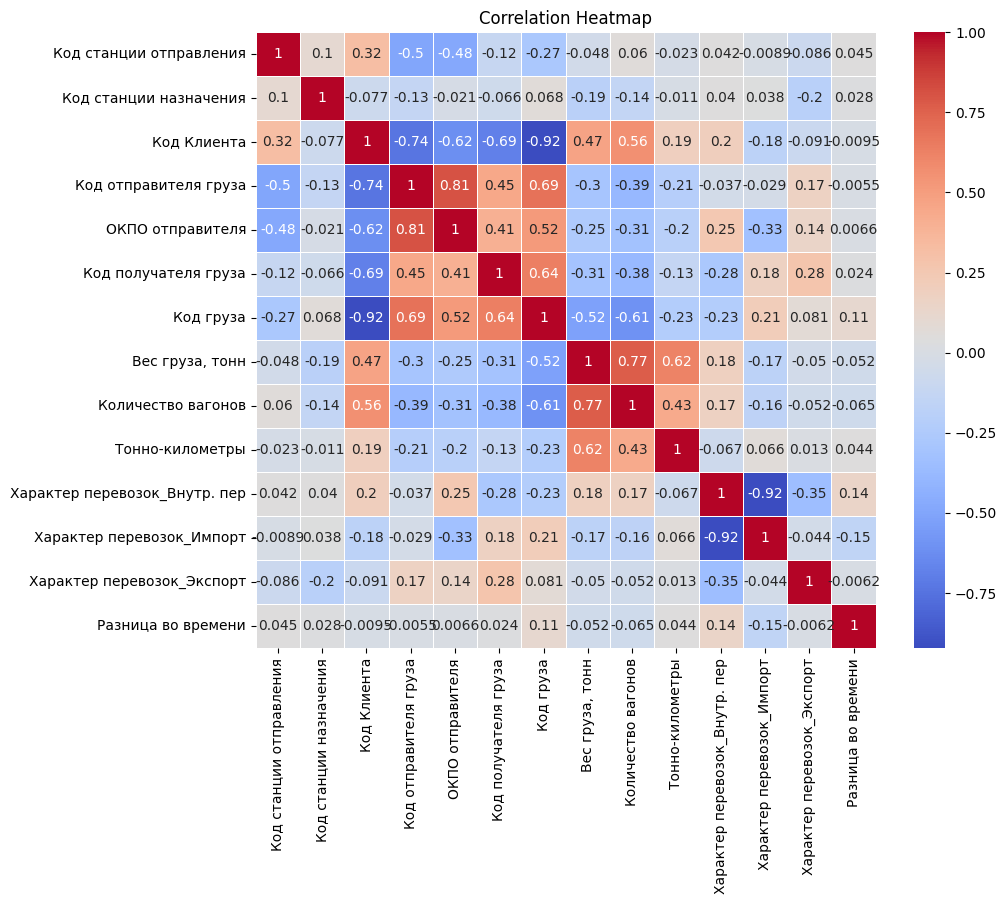

In [17]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()
#Построим матрицу корреляции

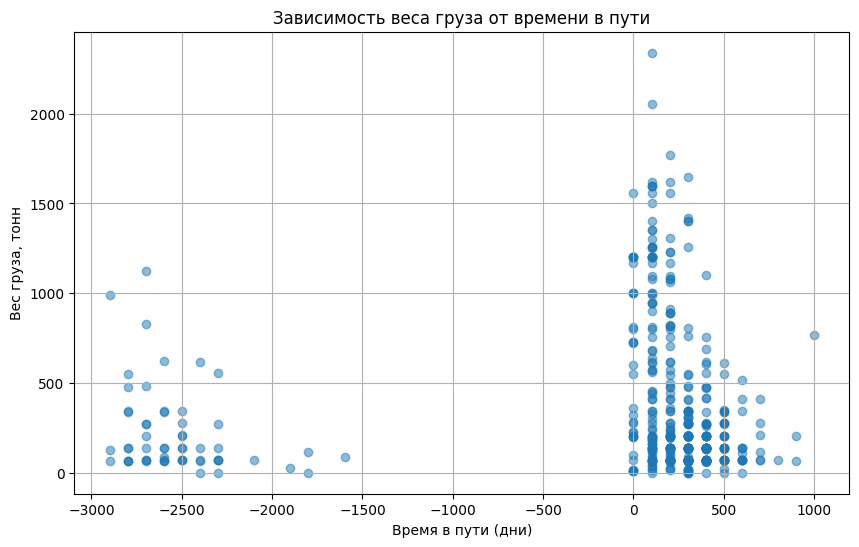

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Разница во времени'], df['Вес груза, тонн'], alpha=0.5)
plt.title('Зависимость веса груза от времени в пути')
plt.xlabel('Время в пути (дни)')
plt.ylabel('Вес груза, тонн')
plt.grid(True)
plt.show()
#График зависимости от вес груза от времени в пути

In [33]:
df_encoded = df_encoded[df_encoded['Разница во времени'] >= 0]

df_encoded
#Замечены некоректные данные, у которых время в пути отрицательное, удаляем эти данные

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Характер перевозок_Внутр. пер,Характер перевозок_Импорт,Характер перевозок_Экспорт,Разница во времени
399,23670,23670,1000108764,3431,85736056,3431,32307,26.342,1,527,1,0,0,2
505,23670,20810,1000108764,3431,85736056,9855,32307,26.395,1,19928,1,0,0,11
506,23670,19020,1000108764,3431,85736056,9855,32307,306.328,7,92817,1,0,0,3
507,23670,19020,1000108764,3431,85736056,9855,32307,219.025,5,66364,1,0,0,2
508,23670,19020,1000108764,3431,85736056,9855,32307,350.239,8,106123,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36008,20000,21580,7000094095,312,83262,263,32106,1080.000,24,152280,1,0,0,2
36009,20000,17440,7000094095,312,83262,289,32106,1768.000,34,788528,1,0,0,2
36010,20000,17440,7000094095,312,83262,289,32106,1560.000,30,695760,1,0,0,2
36011,23820,20000,7000094095,312,83262,312,32105,184.000,8,75992,1,0,0,1


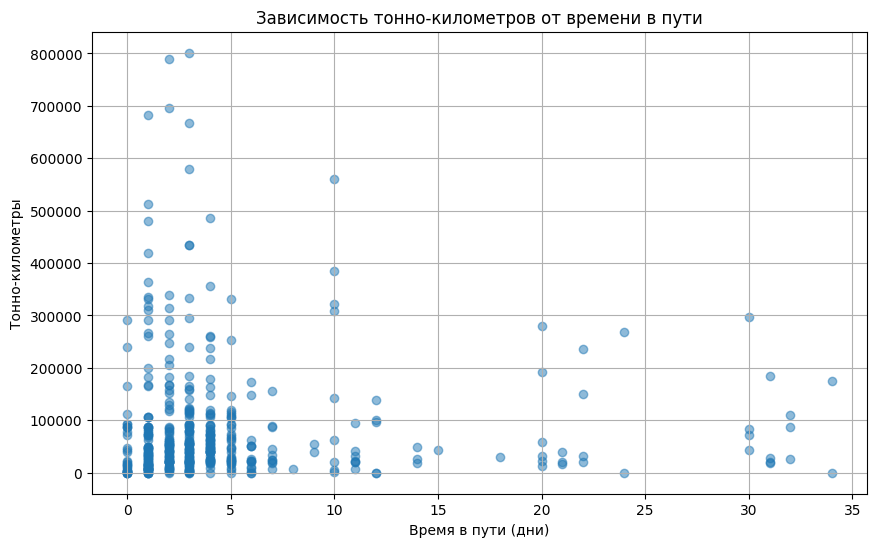

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['Разница во времени'], df_encoded['Тонно-километры'], alpha=0.5)
plt.title('Зависимость тонно-километров от времени в пути')
plt.xlabel('Время в пути (дни)')
plt.ylabel('Тонно-километры')
plt.grid(True)
plt.show()
#График зависимости тонно-километры от времени в пути

In [19]:
df_encoded.info()
#Смотрим информацию о наших данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 399 to 36012
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Код станции отправления        467 non-null    int64  
 1   Код станции назначения         467 non-null    int64  
 2   Код Клиента                    467 non-null    int64  
 3   Код отправителя груза          467 non-null    int64  
 4   ОКПО отправителя               467 non-null    int64  
 5   Код получателя груза           467 non-null    int64  
 6   Код груза                      467 non-null    int64  
 7   Вес груза, тонн                467 non-null    float64
 8   Количество вагонов             467 non-null    int64  
 9   Тонно-километры                467 non-null    int64  
 10  Характер перевозок_Внутр. пер  467 non-null    uint8  
 11  Характер перевозок_Импорт      467 non-null    uint8  
 12  Характер перевозок_Экспорт     467 non-null   

In [34]:
X = df_encoded.drop(columns=['Разница во времени'])
y = (df_encoded['Разница во времени'] > 2).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#По условию задачи разделяю данные на основе того, будет ли доставка больше 2-х дней

In [35]:
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)
#Размерность наборов

Размер обучающего набора: (373, 13)
Размер тестового набора: (94, 13)


In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.model_selection import RepeatedKFold
from tpot import TPOTClassifier
#Необходимые библиотеки

In [22]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    scoring='accuracy',
    cv=cv,
    verbosity=2,
    random_state=1,
    n_jobs=-1
)
#Параметры tpot

In [23]:
tpot.fit(X_train, y_train)
#Обучаю auto-ml и получаем параметры луучшей модели

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8239687055476528

Generation 2 - Current best internal CV score: 0.8293504030346135

Generation 3 - Current best internal CV score: 0.8293504030346135

Generation 4 - Current best internal CV score: 0.8293504030346135

Generation 5 - Current best internal CV score: 0.8293504030346135

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=12, min_samples_split=3, n_estimators=100)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_features=0.2, min_samples_leaf=12, min_samples_split=3, n_estimators=100)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#По лучшей модели смотрим точность

Accuracy: 0.8297872340425532


In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print(f'Accuracy: {accuracy}')
#Проверяем точность на к соседях

Accuracy: 0.71


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_classifier = GradientBoostingClassifier()

gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#ВЫбрал модель градиентный бустинг и оценил ее точность

Accuracy: 0.776595744680851


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#ВЫбрал модель случайный лес и оценил ее точность

Accuracy: 0.7872340425531915


In [40]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

model = CatBoostClassifier(loss_function='Logloss')

model.fit(X_train, y_train, verbose=100)

# Получаем предсказания для тестовых данных
y_pred = model.predict(X_test)

# Рассчитываем точность
accuracy = accuracy_score(y_test, y_pred)

Learning rate set to 0.006762
0:	learn: 0.6893517	total: 2.4ms	remaining: 2.4s
100:	learn: 0.4485047	total: 204ms	remaining: 1.82s
200:	learn: 0.3707864	total: 374ms	remaining: 1.49s
300:	learn: 0.3244343	total: 565ms	remaining: 1.31s
400:	learn: 0.2957461	total: 738ms	remaining: 1.1s
500:	learn: 0.2741810	total: 905ms	remaining: 901ms
600:	learn: 0.2556961	total: 1.08s	remaining: 718ms
700:	learn: 0.2412619	total: 1.26s	remaining: 537ms
800:	learn: 0.2270179	total: 1.43s	remaining: 354ms
900:	learn: 0.2155107	total: 1.59s	remaining: 175ms
999:	learn: 0.2037961	total: 1.75s	remaining: 0us


In [41]:
import shap
explainer_your_model = shap.Explainer(model)
shap_values_your_model = explainer_your_model.shap_values(X_test)

# SHAP для TPOT модели
explainer_tpot = shap.Explainer(best_model)
shap_values_tpot = explainer_tpot.shap_values(X_test)

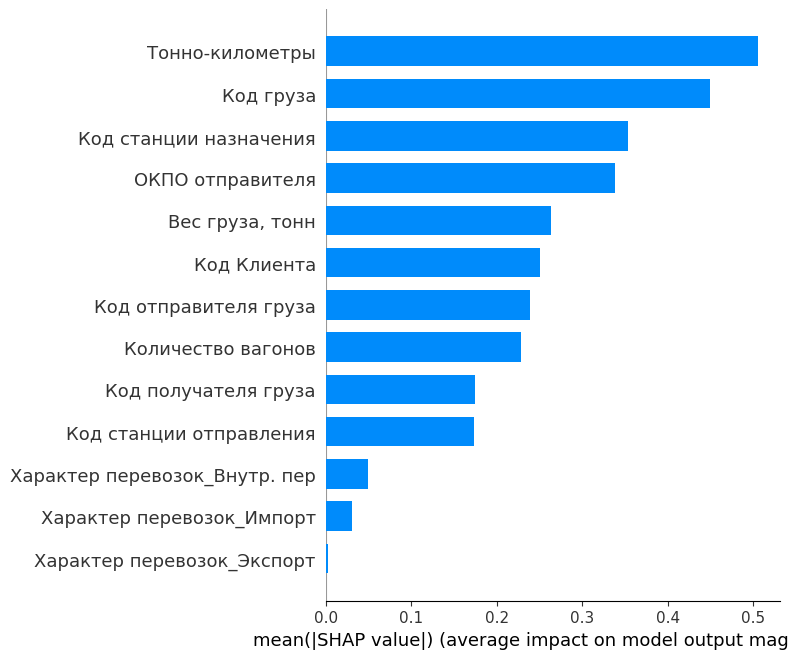

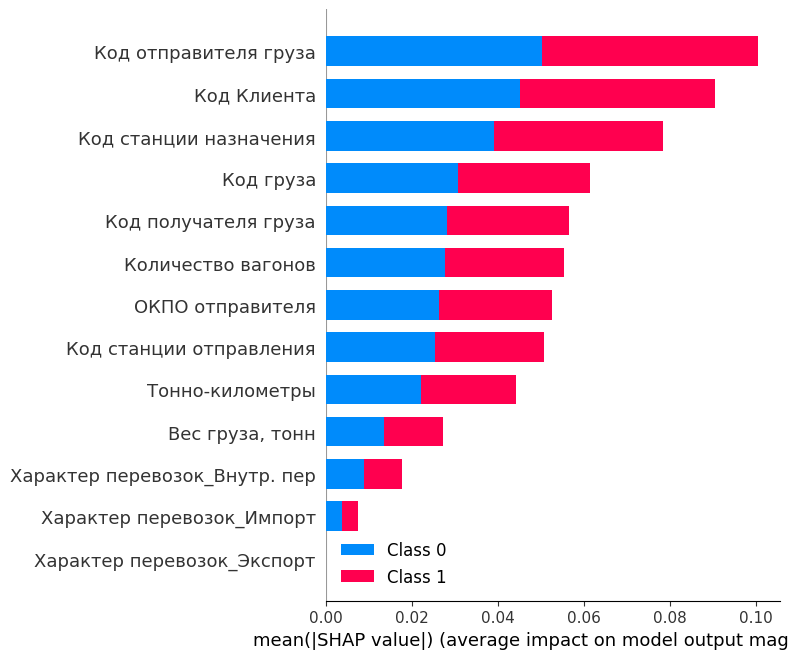

In [24]:
# График для нашей модели
shap.summary_plot(shap_values_your_model, X_test, feature_names=df_encoded.columns, plot_type="bar")

# График для TPOT модели
shap.summary_plot(shap_values_tpot, X_test, feature_names=df_encoded.columns, plot_type="bar")
#Графики показывают важность каждого признака для обучения

In [45]:
df_encoded

,Код станции отправления,Код станции назначения,Код Клиента,Код отправителя груза,ОКПО отправителя,Код получателя груза,Код груза,"Вес груза, тонн",Количество вагонов,Тонно-километры,Характер перевозок_Внутр. пер,Характер перевозок_Импорт,Характер перевозок_Экспорт,Разница во времени
399,23670,23670,1000108764,3431,85736056,3431,32307,26.342,1,527,1,0,0,2
505,23670,20810,1000108764,3431,85736056,9855,32307,26.395,1,19928,1,0,0,11
506,23670,19020,1000108764,3431,85736056,9855,32307,306.328,7,92817,1,0,0,3
507,23670,19020,1000108764,3431,85736056,9855,32307,219.025,5,66364,1,0,0,2
508,23670,19020,1000108764,3431,85736056,9855,32307,350.239,8,106123,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36008,20000,21580,7000094095,312,83262,263,32106,1080.000,24,152280,1,0,0,2
36009,20000,17440,7000094095,312,83262,289,32106,1768.000,34,788528,1,0,0,2
36010,20000,17440,7000094095,312,83262,289,32106,1560.000,30,695760,1,0,0,2
36011,23820,20000,7000094095,312,83262,312,32105,184.000,8,75992,1,0,0,1


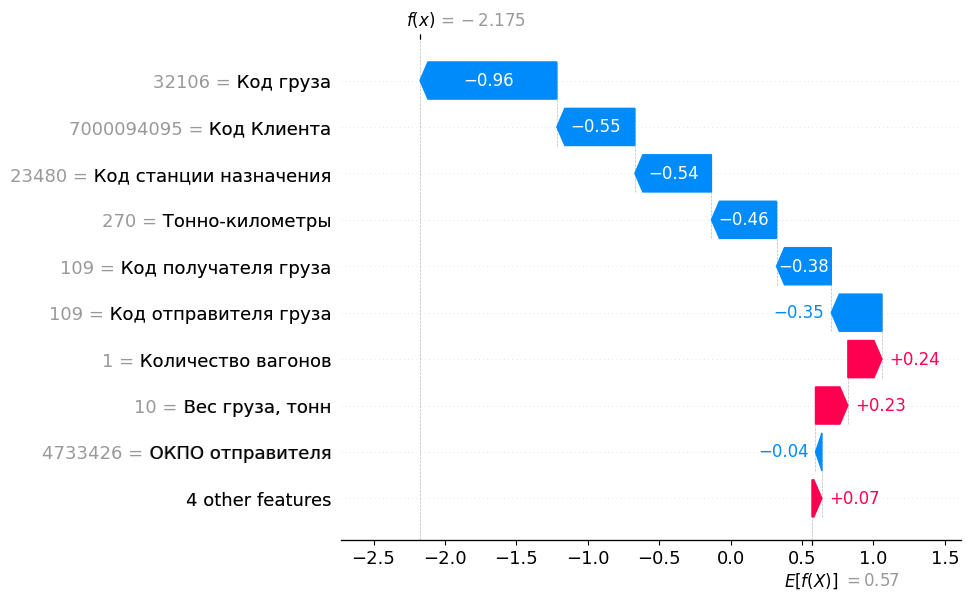

In [48]:
max = 340 
max = shap_values[max]

shap.plots.waterfall(max)
#Здесь id строчки с макс временем

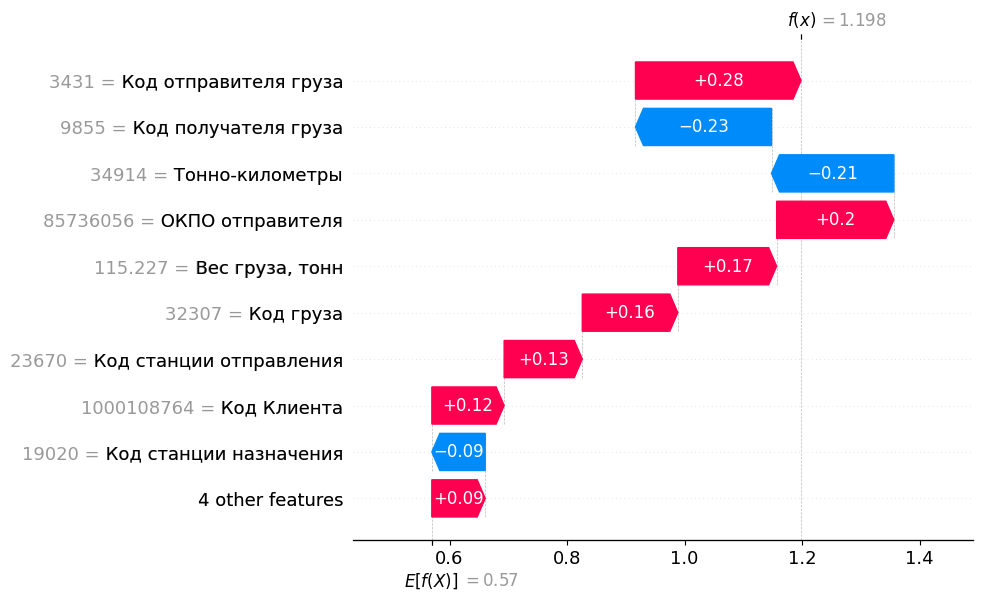

In [50]:
Min = 11
Min = shap_values[Min]

shap.plots.waterfall(Min)
#Здесь id с мин временем